Hello World!

In [16]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans

In [2]:
root_path = 'imagenes'

In [3]:
img_list = os.listdir(root_path)
img_list

['NAIVE_ART_PRIMITIVISM-aldemir-martins_macuna-ma-1982.jpg']

In [5]:
def load_ima(root_path, files_names, flatten= True, normalize = True):
    img_list = list()
    for file in files_names:
        img = cv2.imread(os.path.join(root_path, file)) #Carga la imagen Y DEVUELVE UN ARRAY
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # mantiene el sistema de colores RGC
        
        plt.figure(figsize=(10, 5))

        plt.plot(1, 2, 1)
        plt.title(file)
        plt.imshow(img)
        plt.axis('off')
        
        if flatten:
            img = img.reshape((-1, 3)) # nueva forma de la imagen, el sistema RGB se convierte en un solo array de filas con 3 columnas
        if normalize:
            img = img / 255.0 #normalización de la imagen
        img_list.append(img)
        
    return img_list

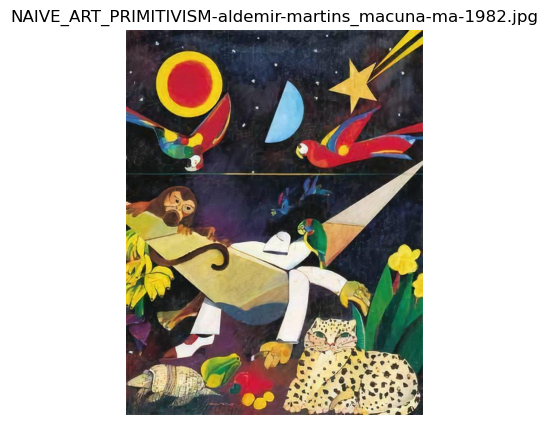

In [12]:
imagenes = load_ima(root_path, img_list, flatten=True, normalize=True)

In [13]:
def silhouette_plot(X, model, k_min=2, k_max=5):
    """
    Genera la gráfica con el coeficiente de la silueta
    
    Parametros:
    X : np.array
        El arreglo con los datos
    model : str
        "kmeans" o "kmedoids", especifica el modelo a entrenar.
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    """
    scores = []
    for i in range(k_min, k_max+1):
        if model == "kmeans":
            model_k = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
        else:
            model_k = KMedoids(n_clusters=i, max_iter=300, random_state=0)
        # Entrenamos el modelo
        model_k.fit(X)
        # Almacenamos el coeficiente de la silueta
        score = silhouette_score(X, model_k.labels_)
        scores.append(score)
    # Mostramos los valores de los coeficientes
    display(pd.DataFrame({'K': range(k_min,k_max+1), 'Coeficiente': scores}))
    # Graficamos los valores del coeficiente de la silueta
    plt.plot(range(k_min,k_max+1), scores, marker='o')
    plt.xlabel('Número de clústeres')
    plt.ylabel('Silhouette Score')
    plt.grid()
    plt.show()

In [ ]:
silhouette_plot(imagenes[0], "kmeans", 2, 10)